# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
pyber_data_df[pyber_data_df['type'] == 'Rural']

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
rides_count = pyber_data_df.groupby(['type']).count()['ride_id']
rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
drivers_count = city_data_df.groupby(['type']).sum()['driver_count']
drivers_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
fare_amounts = pyber_data_df.groupby(['type']).sum()['fare']
fare_amounts

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
mean_ride_fare = pyber_data_df.groupby(['type']).mean()['fare']
mean_ride_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
mean_driver_fare = fare_amounts / drivers_count
mean_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          {"Total Rides": rides_count, 
          "Total Drivers": drivers_count, 
          "Total Fares": fare_amounts,
          "Average Fare per Ride": mean_ride_fare, 
          "Average Fare per Driver": mean_driver_fare})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

# Display the data frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_amounts_date = pyber_data_df.groupby(['type', 'date']).sum()['fare']
fare_amounts_date

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_amounts_date = fare_amounts_date.reset_index()
fare_amounts_date

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_amount_piv_df = fare_amounts_date.pivot(index='date', columns='type', values='fare')
date_amount_piv_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [16]:
date_amount_piv_df.loc[(date_amount_piv_df.index >= '2019-01-01') & (date_amount_piv_df.index <= '2019-04-29')]

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_amount_piv_df = date_amount_piv_df.loc[(date_amount_piv_df.index >= '2019-01-01') & (date_amount_piv_df.index <= '2019-04-29')]
date_amount_piv_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_amount_piv_df.index = pd.to_datetime(date_amount_piv_df.index)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
date_amount_piv_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [20]:
date_amount_piv_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [21]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_amount_piv_df = date_amount_piv_df.resample('W').sum()
date_amount_piv_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [22]:
# create new columns from datetime index
import calendar
date_amount_piv_df["year"] = date_amount_piv_df.index.year
date_amount_piv_df["month"] = date_amount_piv_df.index.month
date_amount_piv_df["month"] = pd.to_datetime(date_amount_piv_df["month"], format='%m').dt.month_name().str.slice(stop=3)
date_amount_piv_df = date_amount_piv_df[["month", "year", "Urban", "Suburban", "Rural"]]
date_amount_piv_df.head()

type,month,year,Urban,Suburban,Rural
date,,,,,
2019-01-06,Jan,2019,1661.68,721.60,187.92
2019-01-13,Jan,2019,2050.43,1105.13,67.65
2019-01-20,Jan,2019,1939.02,1218.20,306.00
2019-01-27,Jan,2019,2129.51,1203.28,179.69
2019-02-03,Feb,2019,2086.94,1042.79,333.08


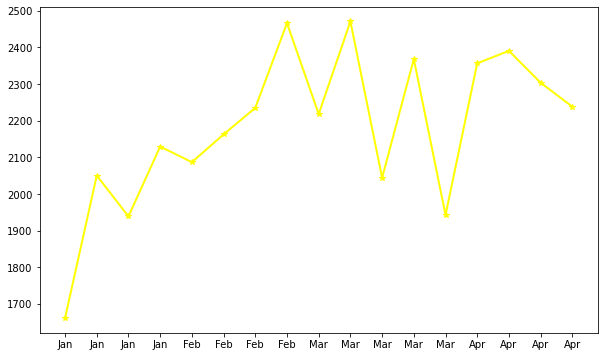

In [23]:
import numpy as np
plt.subplots(figsize=(10, 6))
plt.plot(date_amount_piv_df.index, date_amount_piv_df['Urban'], marker="*", color="yellow", linewidth=2, label='Urban')
plt.xticks(ticks=date_amount_piv_df.index.values, labels=date_amount_piv_df['month'])  # Set label locations.
plt.show()

In [24]:
date_amount_piv_df.index.values

array(['2019-01-06T00:00:00.000000000', '2019-01-13T00:00:00.000000000',
       '2019-01-20T00:00:00.000000000', '2019-01-27T00:00:00.000000000',
       '2019-02-03T00:00:00.000000000', '2019-02-10T00:00:00.000000000',
       '2019-02-17T00:00:00.000000000', '2019-02-24T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-03-10T00:00:00.000000000',
       '2019-03-17T00:00:00.000000000', '2019-03-24T00:00:00.000000000',
       '2019-03-31T00:00:00.000000000', '2019-04-07T00:00:00.000000000',
       '2019-04-14T00:00:00.000000000', '2019-04-21T00:00:00.000000000',
       '2019-04-28T00:00:00.000000000'], dtype='datetime64[ns]')

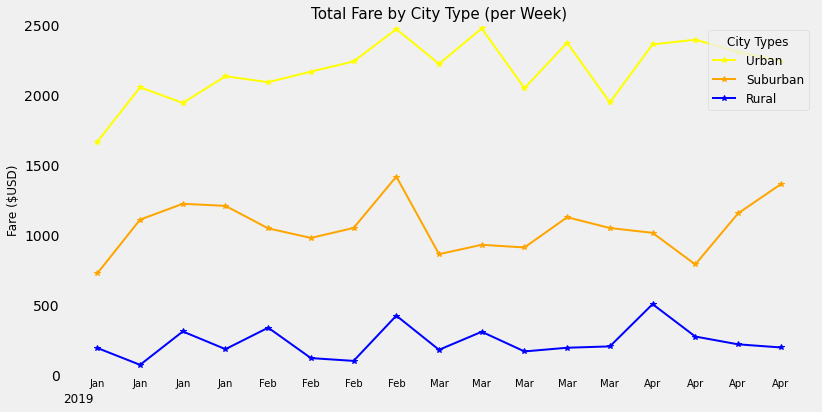

In [26]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
plt.subplots(figsize=(12, 6))
plt.plot(date_amount_piv_df.index, date_amount_piv_df['Urban'], marker="*", color="yellow", linewidth=2, label='Urban')
plt.plot(date_amount_piv_df.index, date_amount_piv_df['Suburban'], marker="*", color="orange", linewidth=2, label='Suburban')
plt.plot(date_amount_piv_df.index, date_amount_piv_df['Rural'], marker="*", color="blue", linewidth=2, label='Rural')
# Create labels for y axis.
plt.ylabel("Fare ($USD)", fontsize= 12)
plt.xlabel("2019", fontsize= 12, loc='left')
# Set the y limit between 0 and 2500.
plt.ylim(0, 2500)
# Set the xticks
plt.xticks(ticks=date_amount_piv_df.index.values, fontsize=10, labels=date_amount_piv_df['month'])
# Create a title.
plt.title("Total Fare by City Type (per Week)", fontsize=15)
# Add a grid.
plt.grid()
# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc=1, title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()